In [1]:
!pip install scikit-fuzzy

DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#### Dans le cadre d’un système de logique floue pour estimer la vitesse ventilateur, créez les variables floues suivantes :

#### 1 température avec les ensembles {froid, moyenne, haute}

#### 2. vitesse avec les ensembles {faible, moyenne, haute}

#### Utilisez des fonctions d’appartenance triangulaire pour l'entrée et une fonction d’appartenance triangulaire automatique pour la sortie.

In [19]:
vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'vitesse') 
temperature = ctrl.Antecedent(np.arange(10, 51, 1), 'temperature') 

temperature['froid'] = fuzz.trimf(temperature.universe, [10, 10, 20])
temperature['agreable'] = fuzz.trimf(temperature.universe, [15, 25, 30])
temperature['chaud'] = fuzz.trimf(temperature.universe, [27, 50, 50])

# --- Vitesse ---
vitesse['faible'] = fuzz.trimf(vitesse.universe, [0, 0, 40])
vitesse['moyenne'] = fuzz.trimf(vitesse.universe, [40, 50, 60])
vitesse['haute'] = fuzz.trimf(vitesse.universe, [60, 100, 100])

#### En vous basant sur les variables floues définies précédemment, affichez leurs fonctions d’appartenance à l’aide de la méthode view()

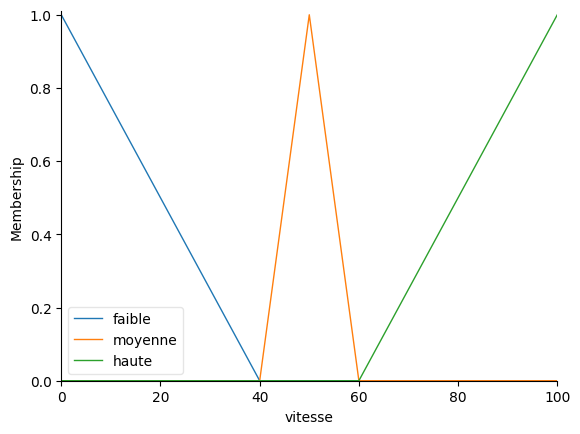

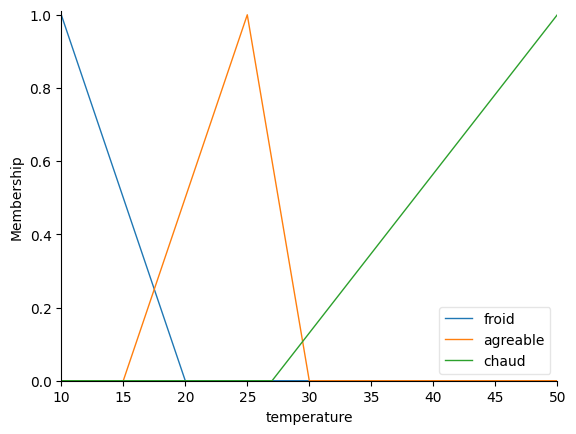

In [20]:
vitesse.view() #affiche un graphique de toutes les fonctions d’appartenance définies pour cette variable.
temperature.view()


#### Écrivez les règles floues reliant la vitesse et la température dans le système de contrôle flou.

In [13]:
#definition des règles floues:
rule1 = ctrl.Rule(temperature['froid'], vitesse['faible'] )
rule2 = ctrl.Rule(temperature['agreable'], vitesse['moyenne'] )
rule3 = ctrl.Rule(temperature['chaud'], vitesse['haute'] )

#### En utilisant les règles floues définies précédemment, créez le système de contrôle flou et simulez son comportement pour une température de 17.
#### Affichez ensuite la valeur de la vitesse calculée.

In [14]:
#regrouper toutes les règles floues pour créer un système flou complet.
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# permet de donner des valeurs d’entrée réelles et de calculer la sortie correspondante.
vitesse_simulator= ctrl.ControlSystemSimulation(vitesse_ctrl)

#Saisie la valeur du température
vitesse_simulator.input['temperature'] = 17

#Résultat calculé
vitesse_simulator.compute()
print(vitesse_simulator.output['vitesse'])

25.73913043478263


#### Visualisez, à l’aide de la méthode view(sim=...), les fonctions d’appartenance des variables floues pour illustrer la position des valeurs d’entrée et de sortie issues de la simulation.

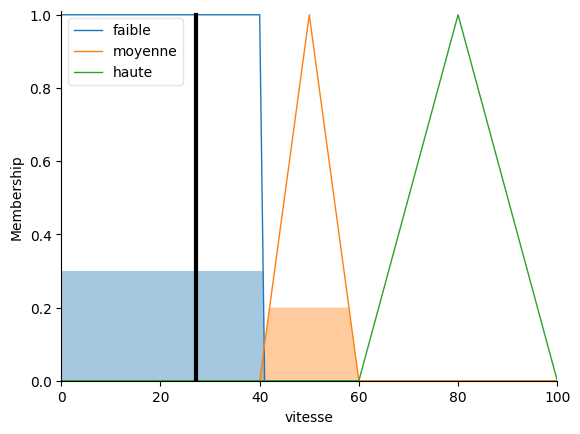

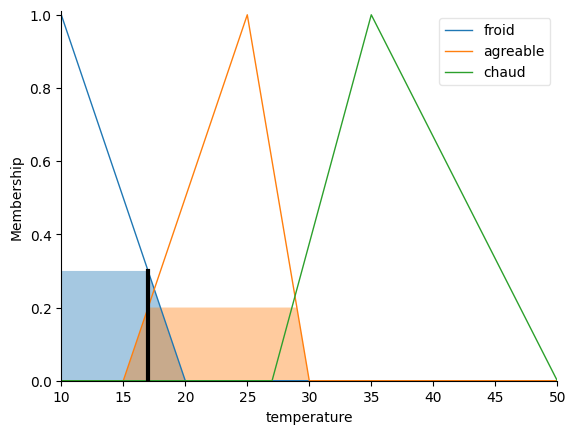

In [22]:
#En ajoutant sim=.., on indique que le graphique doit montrer la valeur d’entrée actuelle et l’effet sur la sortie.
vitesse.view(sim=vitesse_simulator)
temperature.view(sim=vitesse_simulator)